## Supervised Machine Learning


Unknown real-world function:

$$f: X \rightarrow y$$

    predictors (independent variables) 
    target (outcome variable)

Learn a model function based on a train dataset:

$$g: X_D \rightarrow \hat{y}_D$$
$$\text{so that :   } \hat{y}_D \approx{y}_D $$

    predictors 
    ->
    prediction
    
## Two basic procedures: 

+ **Learn** an approximation function $g \approx f$ that maps predictors $X$ to the target $y$ by:
  * selecting best model
  * inferring best parameters
+ **Predict** outcome variable on the validation set

## Two regimes :
+ **train** : learn & predict
+ **test/validation**: predict

## Two performance metrics of prediction:
+ train error
+ validation error
Error: how _far off_ is predicted target $\hat{y}$ from the observed target $y$

## Overfitting: 
+ low train error
+ high validation error


![train and test error](http://blog.fliptop.com/wp-content/uploads/2015/03/highvariance.png)

## Example of overfitting

## Regularization is set of techniques to reduce over-fitting
+ Weight penalization
+ Stochastic penalization (Drop-out)

## Regularization works by forcing a model to be simpler in a sense

### Step back : what is error / loss / distance between prediction and observation
+ For continuous cases, most times it is L2 norm = mean squared error
    * this assumes normal distribution of noise
    
+ For discrete cases it is mis-classification rate

+ In general, both cases are dealing with a quantity proportional:
    * negative log-likelihood 
    * cross-entropy
    * KL divergence

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split

np.random.seed(42)

import  matplotlib.pyplot as plt
%matplotlib inline

# Example: different number of predictors in linear model

In [22]:
N = 200
P = 1000
num_actual_predictors = 10

# y = np.random.randint(10, size=(N))

betas = np.zeros(P)
betas[np.random.randint(P, size = num_actual_predictors )] = 1.0
X = np.random.randn(N,P)

sigma = 1.0
noise = sigma*np.random.randn(N)
y = X.dot(betas) + noise
# X.shape

In [23]:
np.linalg.matrix_rank(X.T.dot(X))

680

In [24]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25, random_state=3)

In [25]:
covarX = X_train.T.dot(X_train)

betahat = np.linalg.solve(covarX, X_train.T).dot(y_train)
mse = np.mean((X_train.dot(betahat) - y_train)**2)
mse

9.1918012754251952e-27

In [ ]:
# betahat - betas

In [26]:
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV, LinearRegression

mo = {}

mo["lr"] = LinearRegression()
mo["lr"].fit(X_train, y_train,)
mo["lr"]

mo["elastic_net"] = ElasticNetCV(l1_ratio=0.5, cv=5)
mo["elastic_net"].fit(X_train, y_train,)
mo["elastic_net"]

mo["lasso"] = LassoCV(cv=5)
mo["lasso"].fit(X_train, y_train,)
mo["lasso"]

mo["ridge"] = RidgeCV(cv=5)
mo["ridge"].fit(X_train, y_train,)
mo["ridge"]

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=5, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

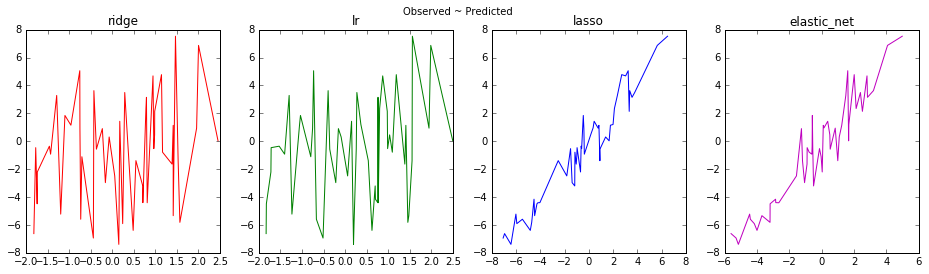

In [35]:
yhats = {}
colors = ['r', 'g', 'b', 'm', 'c']
fig, axs = plt.subplots(1,4, figsize=(16, 4))

plt.suptitle("Observed ~ Predicted")
for (kk,vv), ax,cc in zip(mo.items(), axs, colors):
# for (kk, vv), cc in zip(mo.items(), colors):
    yhats[kk] = vv.predict(X_test)
    order = np.argsort(yhats[kk])
    ax.plot(yhats[kk][order], y_test[order], label = kk,c = cc)
    ax.set_title(kk)

In [55]:
from sklearn.linear_model import ElasticNet
alphas = 10**np.linspace(-4, 1, 50)# mo["elastic_net"].alphas_
train_r2 = []
test_r2 = []
for aa in alphas:
    mo_ = ElasticNet(l1_ratio=0.5, alpha=aa)
    mo_.fit(X_train, y_train)
    train_r2.append( mo_.score(X_train, y_train) )
    test_r2.append( mo_.score(X_test, y_test) )
# plt.plot(mo_.alphas_, mo_.mse_path_.mean(1))
# mo_.score?

/Users/dlituiev/repos/scikit-learn/sklearn/linear_model/coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


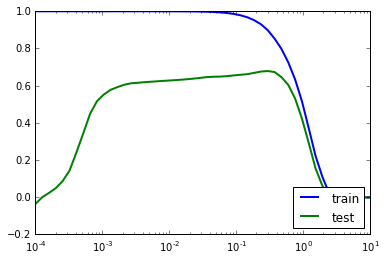

In [56]:
plt.plot(alphas, train_r2, label = "train", lw=2)
plt.plot(alphas, test_r2, label = "test", lw=2)
plt.xscale("log")
plt.legend(loc="lower right")

In [50]:
print("R^2 in-sample:")
{kk: "%.4f" % vv.score(X_train, y_train ) for kk,vv in mo.items()}

R^2 in-sample:


{'elastic_net': '0.7112', 'lasso': '0.8460', 'lr': '0.6395', 'ridge': '0.6382'}

In [52]:
print("R^2 of prediction:")
{kk: "%.4f" % vv.score(X_test, y_test ) for kk,vv in mo.items()}

R^2 of prediction:


{'elastic_net': '0.3932', 'lasso': '0.7124', 'lr': '0.0288', 'ridge': '0.0358'}

In [11]:
print("L2 norm of the coefficients:")
{kk: np.sqrt(sum(vv.coef_**2)) for kk,vv in mo.items()}

L2 norm of the coefficients:


{'elastic_net': 1.3846329611053267,
 'lasso': 1.9704694972436814,
 'lr': 0.93432935152242635,
 'ridge': 0.91811019512644598}

In [12]:
print("L1 norm of the coefficients:")
{kk:sum(abs(vv.coef_)) for kk,vv in mo.items()}

L1 norm of the coefficients:


{'elastic_net': 8.768481767306767,
 'lasso': 8.7046900440382835,
 'lr': 23.496130942978553,
 'ridge': 23.274558796018049}

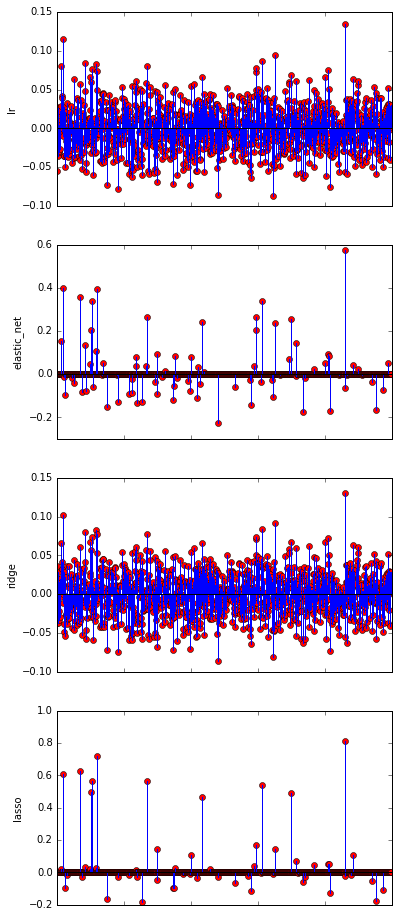

In [13]:
fig, axs = plt.subplots(4, figsize=(6, 16))

for (kk,vv), ax in zip(mo.items(), axs):
    ax.stem(vv.coef_, markerfmt="ro", basefmt='k'+"-")
    ax.set_ylabel(kk)
    ax.set_xticklabels([])

pass

$$y = \sum_k b_j \cdot x_j $$

## Linear algebra: 

$N = P$ and $N<P$ cases

$$y_n = \sum_k b_j \cdot x_{jn} + \epsilon_n $$

OLS solution:
$$ \mathbf{\hat{\beta}} = (X'X)^{-1} X' \mathbf{y} $$

### Definition: 

Set of _linearly independent_ vectors is a set, where none of the elements can be expressed as a linear combination of any vectors from this subset.

Given vectors $\mathbf{x}_1, \mathbf{x}_2, \ldots \mathbf{x}_P$, there is no vector $\mathbf{x}_j$ that can be composed as 
    $$\mathbf{x}_p = \sum_{j=1}^{J<P} \mathbf{x}_j$$

### Theorem:

In a set of vectors of dimensionality $P$, there can be at most $P$ linearly independent vectors.

## Applied to linear regression:


Therefore in $ N \times P $ matrix, there will be at most $P$ linearly independent vectors.

Say we want to predict in $N<P$ task

To 

###  Consider under-determined system of equations 
($N < P$), more independent variables than equations

There will be more than one solution!

![Image of Yaktocat](./table.png)

### Sometimes several models (or infinite set of parameters) explain data equally best
### Which model do we pick in hope that it will predict unseen data best? 
### ...

In [ ]:
X = np.array([[0,1,0], [0,0,1], [1,0,0], [1,1,1]]).T
y = np.c_[3,4,5]
X

In [ ]:
print("""this is a solution:""")
beta = np.r_[2,3,1,2] 
X.dot(beta)

In [ ]:
print("""... and this is a solution as well:""")
beta = np.r_[3,4,2,1]
X.dot(beta)

### Sometimes several models (or infinite set of parameters) explain data equally best
### Which model do we pick in hope that it will predict unseen data best? 
### Use Occam's razor!
+ pick the _simplest_ model possible
+ there can be different meaning to _simplest_:
  * L1
  * L2
  * max-norm

### From linear algebra perspective:

the system of equations is sloppy, it admits multiple solutions

## From probabilistic / machine learning point of view:
Multiple model are able to produce the same result. Which model will you believe more?

## Deep models
Example of CNN for MNIST in Keras: 2 convolutional layers with 32 filters 3x3 and 128 fully connected layers, pool 2x2.

    input 28*28 = 784
    filters: two conv layers, each 32*(3*3+1) = 320

    dense: 4608 * 128 = 589824 weights

    Total: 590'464 weights

Almost 600'000 parameters

Train set: 60'000 samples

### Drop-out in linear regression as a penalty factor:

$$\hat{\mathbf{w}} = \mathrm{argmin}_\mathbf{w} \mathrm{logloss} $$

$$ \mathrm{logloss} = \mathbb{E}_{R\sim\mathrm{Bernoulli}(p)}
\left[ \left\lVert \mathbf{y} - (R \odot X) \mathbf{w} \right\rVert^2 \right] $$

$$\mathrm{logloss} = \mathbb{E}_{R_j^i\sim\mathrm{Bernoulli}(p)}
\left[ \left\lVert y^i - R_j^i \cdot X_j^i \cdot w^j \right\rVert^2 \right] $$


Taking the expectation:

$$\mathrm{logloss} = 
\left\lVert y^i - p \cdot X_j^i \cdot w^j \right\rVert^2  +  p \, (1-p) \, w_j X^j_i  \cdot X^i_{\hat{j}} \cdot w^{\hat{j}} $$

$$\mathrm{logloss} = 
\left\lVert \mathbf{y} - p \cdot X \cdot \mathbf{w} \right\rVert^2  + 
p \, (1-p) \, \left\lVert  \Gamma \mathbf{w} \right\rVert^2 $$

where $\Gamma = (\mathrm{diag}(X^T X))^{1/2}$

#### Thus drop-out can be seen as a stochastic penalization technique

#### Some hints for the derivation:
Bernoulli distribution 
$$P(x|p) = p^x \cdot p^{1-x}$$
$$\mathbb{E}(x) = p $$
$$\mathbb{E}(x^2) = p $$
$$\mathbb{E}(x_i\cdot x_j) = p^2 $$


$$\mathbb{E}(x_i^{\hat{j}}\cdot x_j^i) 
= (1-\delta_j^{\hat{j}}) \cdot p + \delta_j^{\hat{j}} \cdot p^2
= p + (p^2 - p) \cdot \delta_j^{\hat{j}}
$$



[see Srivastava et al., 2014](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf)

## Out-of sample prediction error
how far off is this particular model from real data


## Average model
a model of given kind (i.e. with fixed architecture and hyperparameters) trained on all possible sets of data drawn from real world (it is an abstract notion!)

## Bias:
how far off is an average model of this kind from the real data


## Variance 
how far is this particular model off from an average model of this kind

[see](https://work.caltech.edu/library/080.pdf)

## Analogies

Imagine a regular mattress --> low variance

Imagine a mattress that perfectly fits your shape when you lie on your left side with your left knee and elbow bent --> high variance

## Probabilistic framework

Data is generated by a distribution $y \sim P(y|X)$
We seek an approximating probabilistic model $y \sim Q(y|X)$

### Possible formulations of _optimal_ predictive model

Same thing:

+ minimize Kullback–Leibler divergence by minimizing the cross-entropy:
$$\mathrm{KL}[ P || Q ] = \mathbb{E}_P \log\left(\frac{P}{Q} \right) = H(P,Q)  - H(P) $$
$$H(P,Q) = -\mathbb{E}_P \log(Q) $$

+ maximum likelihood:

    maximize likelihood of the parameters $\theta$ of the model $Q(y|x, \theta)$ given observed $\{x,y\}$ points drawn from the real-world distribution $P(y|x)$
    
$$\mathrm{argmin}_\theta \mathbb{E}_{P(y|x)} \log Q(y|x, \theta) $$

+ minimize loss


# Example: number of parameters in non-linear models

$$y = \sum_k b_k \cdot f_k(x) $$

$$y = \sum_k b_k \cdot x^k $$

In [138]:
N = 80
P = 5
# num_actual_predictors = 7
# y = np.random.randint(10, size=(N))
# betas = np.zeros(P)
# betas[np.random.randint(P, size = num_actual_predictors )] = 1.0
X = np.nan* np.ones((N,P))

X[:,0] = 2.0*np.random.randn(N,)

for pp in range(1, P-P//2):
    X[:,pp] = X[:,0]**pp
 
for pp in range( P-P//2, P):
    X[:,pp] = 1.0*np.random.randn(N,)

sigma = 1.2
noise = sigma*np.random.rand(N)
# y = X.dot(betas) + noise
y = np.cos(np.pi*2/3 +X[:,0]) + noise
# y = 0.05*X[:,0]**2 + noise
# y = np.cos(X[:,0]) + noise
# X.shape

## Note:
our predictive model does not match the ground truth

[as a rule, we cannot know how the data is generated in the real world](https://en.wikipedia.org/wiki/All_models_are_wrong)

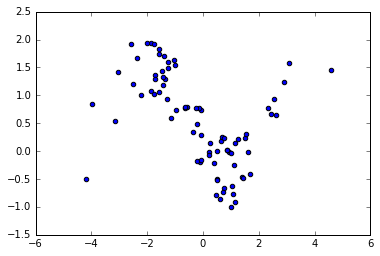

In [139]:
plt.scatter(X[:,0], y)

In [140]:
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV, LinearRegression

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25, random_state=3)
mo = {}

mo["lr"] = LinearRegression()
mo["lr"].fit(X_train, y_train,)
mo["lr"]

mo["elastic_net"] = ElasticNetCV(l1_ratio=0.5, cv=5)
mo["elastic_net"].fit(X_train, y_train,)
mo["elastic_net"]

mo["lasso"] = LassoCV(cv=5)
mo["lasso"].fit(X_train, y_train,)
mo["lasso"]

mo["ridge"] = RidgeCV(cv=5)
mo["ridge"].fit(X_train, y_train,)
mo["ridge"]

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=5, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [141]:
print("R^2 in-sample:")
{kk: "%.4f" % vv.score(X_train, y_train ) for kk,vv in mo.items()}

R^2 in-sample:


{'elastic_net': '0.2308', 'lasso': '0.2313', 'lr': '0.2679', 'ridge': '0.2673'}

In [142]:
print("R^2 of prediction:")
{kk: "%.4f" % vv.score(X_test, y_test ) for kk,vv in mo.items()}

R^2 of prediction:


{'elastic_net': '0.0382',
 'lasso': '0.0380',
 'lr': '-0.0513',
 'ridge': '-0.0194'}

ridge -0.019437315484
lr -0.0513318060095
elastic_net 0.0382387654266
lasso 0.0379982257847


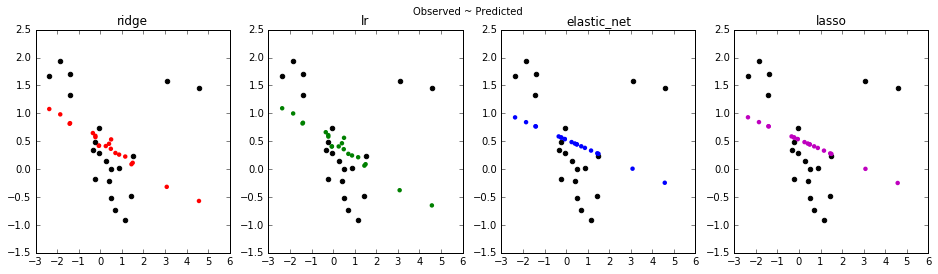

In [143]:
yhats = {}
colors = ['r', 'g', 'b', 'm', 'c']
fig, axs = plt.subplots(1,4, figsize=(16, 4))

plt.suptitle("Observed ~ Predicted")
for (kk,vv), ax,cc in zip(mo.items(), axs, colors):
# for (kk, vv), cc in zip(mo.items(), colors):
    yhats[kk] = vv.predict(X_test)
    print(kk, vv.score(X_test, y_test))
    order = np.argsort(yhats[kk])
    ax.scatter(X_test[:,0], y_test, c='k')
#     ax.plot(X_test[:,0][order], yhats[kk][order], label = kk, c = cc, lw=2)
    ax.scatter(X_test[:,0][order], yhats[kk][order], label = kk, c = cc, edgecolors='none')
#     ax.plot(yhats[kk][order], y_test[order], label = kk,c = cc)
    ax.set_title(kk)

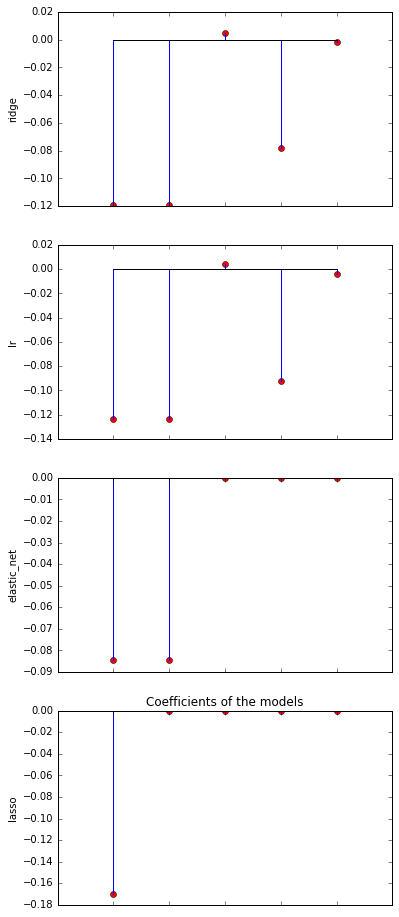

In [144]:
fig, axs = plt.subplots(4, figsize=(6, 16))

plt.title("Coefficients of the models")
for (kk,vv), ax in zip(mo.items(), axs):
    ax.stem(vv.coef_, markerfmt="ro", basefmt='k'+"-")
    ax.set_ylabel(kk)
    ax.set_xticklabels([])
    ax.set_xlim([-1, X.shape[1] ])
pass